In [57]:
# import libraries

import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [2]:
# load dataset and convert to Dataframe

data = pd.read_csv('/Users/minkhant/Documents/IU/3rd Semester/Unsupervised ML/archive/mental-heath-in-tech-2016_20161114.csv')
df = pd.DataFrame(data)
pd.set_option('display.max_columns', None)

# Data Preprocessing and Exploration

In [3]:
# get info and describe of the data

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

In [4]:
print(df.describe())

       Are you self-employed?  \
count             1433.000000   
mean                 0.200279   
std                  0.400349   
min                  0.000000   
25%                  0.000000   
50%                  0.000000   
75%                  0.000000   
max                  1.000000   

       Is your employer primarily a tech company/organization?  \
count                                        1146.000000         
mean                                            0.770506         
std                                             0.420691         
min                                             0.000000         
25%                                             1.000000         
50%                                             1.000000         
75%                                             1.000000         
max                                             1.000000         

       Is your primary role within your company related to tech/IT?  \
count                               

In [5]:
print(df.shape)

(1433, 63)


In [6]:
# check the total numbers of null data

list(df.isnull().sum())

[0,
 287,
 287,
 1170,
 287,
 420,
 287,
 287,
 287,
 287,
 287,
 287,
 287,
 287,
 287,
 287,
 1146,
 1146,
 1146,
 1289,
 1146,
 1146,
 1146,
 1229,
 0,
 169,
 169,
 169,
 169,
 169,
 169,
 169,
 169,
 169,
 169,
 169,
 0,
 338,
 0,
 307,
 0,
 0,
 0,
 89,
 776,
 0,
 0,
 0,
 865,
 1111,
 0,
 722,
 0,
 0,
 0,
 0,
 3,
 0,
 593,
 0,
 582,
 0,
 0]

In [7]:
# removing the columns that has over 500 null data

cols_to_remove = list(df.isnull().sum()>=500)
df.drop(df.columns[cols_to_remove], axis = 1, inplace=True)
df.shape

(1433, 48)

In [8]:
# rename the columns

df.columns

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative

In [9]:
rename_cols = {'Are you self-employed?' : 'Self-employed',
       'How many employees does your company or organization have?' : 'Number of Employees',
       'Is your employer primarily a tech company/organization?' : 'Tech Company',
       'Does your employer provide mental health benefits as part of healthcare coverage?' : 'MH Benefits',
       'Do you know the options for mental health care available under your employer-provided coverage?' : 'MH Care Availability',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?' : 'MH Discussion',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?' : 'MH resources',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?' : 'Anonymity Protected',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:' : 'Medical Leave',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?' : 'MHD Neg Result',
       'Do you think that discussing a physical health issue with your employer would have negative consequences?' : 'PHD Neg Result',
       'Would you feel comfortable discussing a mental health disorder with your coworkers?' : 'MHD w Coworkers',
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?' : 'MHD w DS',
       'Do you feel that your employer takes mental health as seriously as physical health?' : 'MH = PH',
       'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?' : 'MH Coworker States Neg Result',
       'Do you have previous employers?' : 'Prev Employers',
       'Have your previous employers provided mental health benefits?' : 'Prev MH Benefits',
       'Were you aware of the options for mental health care provided by your previous employers?' : 'Prev MH Awareness',
       'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?' : 'Prev MHD',
       'Did your previous employers provide resources to learn more about mental health issues and how to seek help?' : 'Prev MH Resources',
       'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?' : 'Prev Anonymity Protected',
       'Do you think that discussing a mental health disorder with previous employers would have negative consequences?' : 'Prev MHD Neg Result',
       'Do you think that discussing a physical health issue with previous employers would have negative consequences?' : 'Prev PHD Neg Result',
       'Would you have been willing to discuss a mental health issue with your previous co-workers?' : 'Prev MHD w Coworkers',
       'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?' : 'Prev MHD w DS',
       'Did you feel that your previous employers took mental health as seriously as physical health?' : 'Prev MH = PH',
       'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?' : 'Prev MH Coworker States Neg Result',
       'Would you be willing to bring up a physical health issue with a potential employer in an interview?' : 'PH in Interview',
       'Why or why not?' : 'Why/not',
       'Would you bring up a mental health issue with a potential employer in an interview?' : 'MH in Interview',
       'Why or why not?.1' : 'Why/not_1',
       'Do you feel that being identified as a person with a mental health issue would hurt your career?' : 'MH on Career',
       'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?' : 'Neg View of Coworker',
       'How willing would you be to share with friends and family that you have a mental illness?' : 'MH Share Family',
       'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?' : 'MH Bad Response',
       'Do you have a family history of mental illness?' : 'MH Family History',
       'Have you had a mental health disorder in the past?': 'MH Past',
       'Do you currently have a mental health disorder?' : 'MH Present',
       'Have you been diagnosed with a mental health condition by a medical professional?' : 'MH Diagonosed',
       'Have you ever sought treatment for a mental health issue from a mental health professional?' : 'MH Sought Treatment',
       'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?' : 'MH Effective Treatment',
       'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?' : 'MH NOT Effective Treatment',
       'What is your age?': 'Age', 'What is your gender?' : 'Gender',
       'What country do you live in?': 'Country/Live', 'What country do you work in?' : 'Country/Work',
       'Which of the following best describes your work position?' : 'Work Position',
       'Do you work remotely?': 'Remote'}

df.rename(columns=rename_cols, inplace=True)
df.columns

Index(['Self-employed', 'Number of Employees', 'Tech Company', 'MH Benefits',
       'MH Care Availability', 'MH Discussion', 'MH resources',
       'Anonymity Protected', 'Medical Leave', 'MHD Neg Result',
       'PHD Neg Result', 'MHD w Coworkers', 'MHD w DS', 'MH = PH',
       'MH Coworker States Neg Result', 'Prev Employers', 'Prev MH Benefits',
       'Prev MH Awareness', 'Prev MHD', 'Prev MH Resources',
       'Prev Anonymity Protected', 'Prev MHD Neg Result',
       'Prev PHD Neg Result', 'Prev MHD w Coworkers', 'Prev MHD w DS',
       'Prev MH = PH', 'Prev MH Coworker States Neg Result', 'PH in Interview',
       'Why/not', 'MH in Interview', 'Why/not_1', 'MH on Career',
       'Neg View of Coworker', 'MH Share Family', 'MH Bad Response',
       'MH Family History', 'MH Past', 'MH Present', 'MH Diagonosed',
       'MH Sought Treatment', 'MH Effective Treatment',
       'MH NOT Effective Treatment', 'Age', 'Gender', 'Country/Live',
       'Country/Work', 'Work Position', 'Remote

In [10]:
# replace missing values

df.isnull().sum()

Self-employed                           0
Number of Employees                   287
Tech Company                          287
MH Benefits                           287
MH Care Availability                  420
MH Discussion                         287
MH resources                          287
Anonymity Protected                   287
Medical Leave                         287
MHD Neg Result                        287
PHD Neg Result                        287
MHD w Coworkers                       287
MHD w DS                              287
MH = PH                               287
MH Coworker States Neg Result         287
Prev Employers                          0
Prev MH Benefits                      169
Prev MH Awareness                     169
Prev MHD                              169
Prev MH Resources                     169
Prev Anonymity Protected              169
Prev MHD Neg Result                   169
Prev PHD Neg Result                   169
Prev MHD w Coworkers              

In [11]:
impute = SimpleImputer(missing_values= np.nan, strategy= 'most_frequent')
impute = impute.fit(df)
impute = impute.transform(df)
imputed_df = pd.DataFrame(data=impute, columns=df.columns)

In [12]:
imputed_df.isnull().sum()

Self-employed                         0
Number of Employees                   0
Tech Company                          0
MH Benefits                           0
MH Care Availability                  0
MH Discussion                         0
MH resources                          0
Anonymity Protected                   0
Medical Leave                         0
MHD Neg Result                        0
PHD Neg Result                        0
MHD w Coworkers                       0
MHD w DS                              0
MH = PH                               0
MH Coworker States Neg Result         0
Prev Employers                        0
Prev MH Benefits                      0
Prev MH Awareness                     0
Prev MHD                              0
Prev MH Resources                     0
Prev Anonymity Protected              0
Prev MHD Neg Result                   0
Prev PHD Neg Result                   0
Prev MHD w Coworkers                  0
Prev MHD w DS                         0


In [13]:
# checkpoint
df1 = imputed_df.copy()

In [14]:
# check the unique values of the columns

for column in df1.columns:
    unique_values = df1[column].unique()
    print(f"{column} : {unique_values}")

Self-employed : [0 1]
Number of Employees : ['26-100' '6-25' 'More than 1000' '100-500' '500-1000' '1-5']
Tech Company : [1.0 0.0]
MH Benefits : ['Not eligible for coverage / N/A' 'No' 'Yes' "I don't know"]
MH Care Availability : ['No' 'Yes' 'I am not sure']
MH Discussion : ['No' 'Yes' "I don't know"]
MH resources : ['No' 'Yes' "I don't know"]
Anonymity Protected : ["I don't know" 'Yes' 'No']
Medical Leave : ['Very easy' 'Somewhat easy' 'Neither easy nor difficult' 'Very difficult'
 'Somewhat difficult' "I don't know"]
MHD Neg Result : ['No' 'Maybe' 'Yes']
PHD Neg Result : ['No' 'Maybe' 'Yes']
MHD w Coworkers : ['Maybe' 'Yes' 'No']
MHD w DS : ['Yes' 'Maybe' 'No']
MH = PH : ["I don't know" 'Yes' 'No']
MH Coworker States Neg Result : ['No' 'Yes']
Prev Employers : [1 0]
Prev MH Benefits : ['No, none did' 'Yes, they all did' 'Some did' "I don't know"]
Prev MH Awareness : ['N/A (not currently aware)' 'I was aware of some'
 'Yes, I was aware of all of them' 'No, I only became aware later']
P

In [15]:
# Replace M, F, Others to Gender columns

male = ['Male', 'male', 'Male ','M', 'm','man','Cis male', 'Male.','male 9:1 female, roughly', 'Male (cis)','Man', 'Sex is male','cis male', 'Dude',"I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer','male ','Cis Male', 'Male (trans, FtM)',  'cisdude', 'cis man', 'MALE']

female = ['Female','female',
       'I identify as female.', 'female ', 'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
       'Cis female ', 'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ',
       'woman', 'female/woman', 'Cisgender Female', 'genderqueer woman','fem','Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman','female-bodied; no feelings about gender']

others = ['Bigender', 'non-binary','Transitioned, M2F', 'Other/Transfeminine','Androgynous', 'Other', 'nb masculine','none of your business',
       'genderqueer','Human', 'Genderfluid', 'Enby', 'Malr',
       'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid','Nonbinary',
       'human', 'Unicorn', 'Genderqueer', 'Genderflux demi-girl', 'AFAB',
       'Transgender woman']

df1['Gender'].replace(to_replace=male, value= 'M', inplace=True)
df1['Gender'].replace(to_replace=female, value= 'F', inplace=True)
df1['Gender'].replace(to_replace=others, value= 'Other', inplace=True)

/var/folders/68/d21xtbv549s8tn0b9z97hhch0000gn/T/ipykernel_56790/1980708821.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Gender'].replace(to_replace=male, value= 'M', inplace=True)


In [16]:
df1['Gender'].value_counts()

Gender
M        1062
F         342
Other      29
Name: count, dtype: int64

(array([19., 30.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  3.,  35.,  67.,  99., 131., 163., 195., 227., 259., 291., 323.]),
 <BarContainer object of 10 artists>)

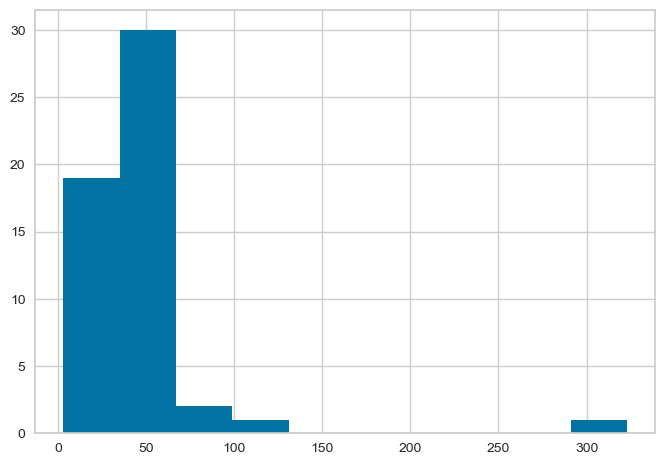

In [17]:
# Replace outliers age

plt.hist(df1['Age'].unique())

In [18]:
# Calculate the mean of age between 18 and 75
mean_age = df1[(df1['Age']>=18) | (df1['Age']<=75)]['Age'].mean().round()
print(mean_age)

34.0


/var/folders/68/d21xtbv549s8tn0b9z97hhch0000gn/T/ipykernel_56790/375694472.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].replace(df1[(df1['Age']<18) | (df1['Age']>75)]['Age'].to_list(), mean_age, inplace = True)
/var/folders/68/d21xtbv549s8tn0b9z97hhch0000gn/T/ipykernel_56790/375694472.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set 

(array([6., 5., 6., 5., 6., 5., 6., 4., 3., 2.]),
 array([19. , 24.5, 30. , 35.5, 41. , 46.5, 52. , 57.5, 63. , 68.5, 74. ]),
 <BarContainer object of 10 artists>)

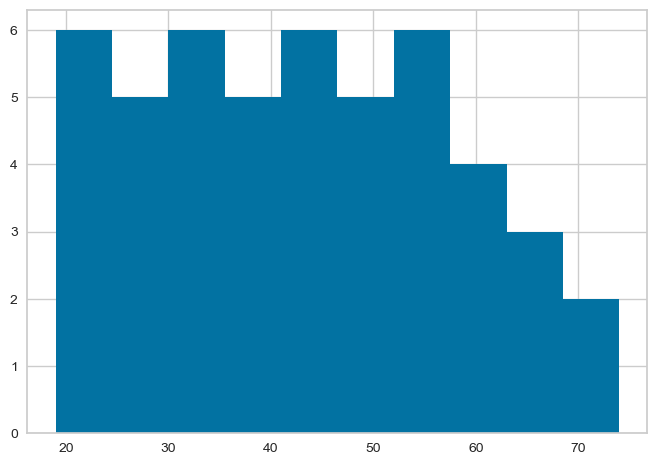

In [19]:
df1['Age'].replace(df1[(df1['Age']<18) | (df1['Age']>75)]['Age'].to_list(), mean_age, inplace = True)
plt.hist(df1['Age'].unique())

In [20]:
df1['Work Position'].unique()

array(['Back-end Developer', 'Back-end Developer|Front-end Developer',
       'Supervisor/Team Lead',
       'Executive Leadership|Supervisor/Team Lead|Dev Evangelist/Advocate|DevOps/SysAdmin|Support|Back-end Developer|Front-end Developer',
       'DevOps/SysAdmin|Support|Back-end Developer|Front-end Developer|Designer',
       'Dev Evangelist/Advocate|Back-end Developer',
       'Support|Back-end Developer|One-person shop',
       'One-person shop|Front-end Developer|Back-end Developer',
       'Front-end Developer', 'Executive Leadership',
       'Supervisor/Team Lead|Dev Evangelist/Advocate|Back-end Developer|Front-end Developer',
       'DevOps/SysAdmin|Back-end Developer|Front-end Developer',
       'Designer', 'Other|Executive Leadership', 'One-person shop',
       'Other', 'Supervisor/Team Lead|Support|Back-end Developer',
       'Supervisor/Team Lead|DevOps/SysAdmin|Back-end Developer',
       'Other|Supervisor/Team Lead|Support|Back-end Developer|Designer',
       'Supervisor/

In [21]:
work_position = df1['Work Position'].unique()

job_cat = {'IT' : ['Back', 'Developer', 'Front'],
           'DevOps' : ['DevOps', 'SysAdmin'],
          'Management' : ['Supervisor', 'Team', 'Lead', 'Executive', 'Leadership'],
          'Support': ['Support'],
          'One-person shop':['One', 'person', 'shop'],
          'HR' : ['HR'], 'Advocacy': ['Evangelist', 'Advocate'],
    'Design': ['Design'], 
    'Sales': ['Sales'],'Other' : ['Other']}

for job in work_position:
    for word in job.lower().split():
        for key, values in job_cat.items():
            if any(value.lower() in word for value in values):
                df1['Work Position'].replace(job, value=key, inplace=True)
                break
                
df1['Work Position'].value_counts()

/var/folders/68/d21xtbv549s8tn0b9z97hhch0000gn/T/ipykernel_56790/451420296.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Work Position'].replace(job, value=key, inplace=True)


Work Position
IT                 742
Management         272
Other              121
One-person shop    110
DevOps              79
Support             42
Design              28
Advocacy            28
HR                   7
Sales                4
Name: count, dtype: int64

In [22]:
country = ['France', 'Venezuela', 'Poland', 'Belgium', 'Brazil', 'Denmark',
       'Sweden', 'Russia', 'Spain', 'India', 'Mexico', 'Switzerland',
       'Norway', 'Argentina', 'Ireland', 'Italy', 'Finland', 'Colombia',
       'Costa Rica', 'Vietnam', 'Bulgaria', 'New Zealand', 'South Africa',
       'Slovakia', 'Austria', 'Bangladesh', 'Algeria', 'Pakistan',
       'Afghanistan', 'Greece', 'Romania', 'Other', 'Brunei', 'Japan',
       'Iran', 'Hungary', 'Israel', 'Ecuador', 'Bosnia and Herzegovina',
       'China', 'Chile', 'Guatemala', 'Taiwan', 'Serbia', 'Estonia', 'Czech Republic', 'Lithuania', 'United Arab Emirates', 'Turkey']

df1['Country/Work'].replace(country, 'Others', inplace=True)
df1['Country/Work'].replace('United States of America', 'USA', inplace=True)
df1['Country/Work'].replace('United Kingdom', 'UK', inplace=True)

/var/folders/68/d21xtbv549s8tn0b9z97hhch0000gn/T/ipykernel_56790/2022678660.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Country/Work'].replace(country, 'Others', inplace=True)


In [23]:
df1['Country/Work'].unique()

array(['UK', 'USA', 'Canada', 'Germany', 'Netherlands', 'Others',
       'Australia'], dtype=object)

In [24]:
# remove the unnecessary columns

columns_remove = ['Self-employed', 'Country/Live', 'Remote', 'Number of Employees','PH in Interview', 'Why/not']
df1.drop(df1[columns_remove], axis = 1, inplace=True)

In [25]:
# select the participants who were working in tech company

df1 = df1[df1['Tech Company'] == 1]
df1.drop(columns='Tech Company', axis = 1, inplace = True)

In [26]:
df1.shape

(1170, 41)

In [27]:
#checking duplicates

df1.duplicated().sum()

0

# Data Analysis and Overview of the data
## Gender

In [28]:
df_analysis = df1.copy()

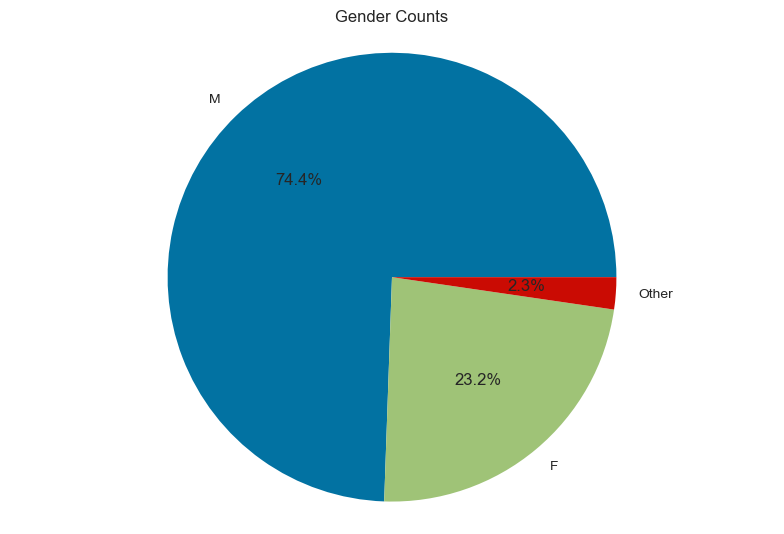

In [29]:
fig1, ax1 = plt.subplots()
ax1.pie(df_analysis['Gender'].value_counts() , labels=df_analysis['Gender'].unique(), autopct='%1.1f%%')
ax1.set_title('Gender Counts')
ax1.axis('equal')
plt.tight_layout()
#plt.show()
plt.savefig('Gender Counts.png', transparent = True)

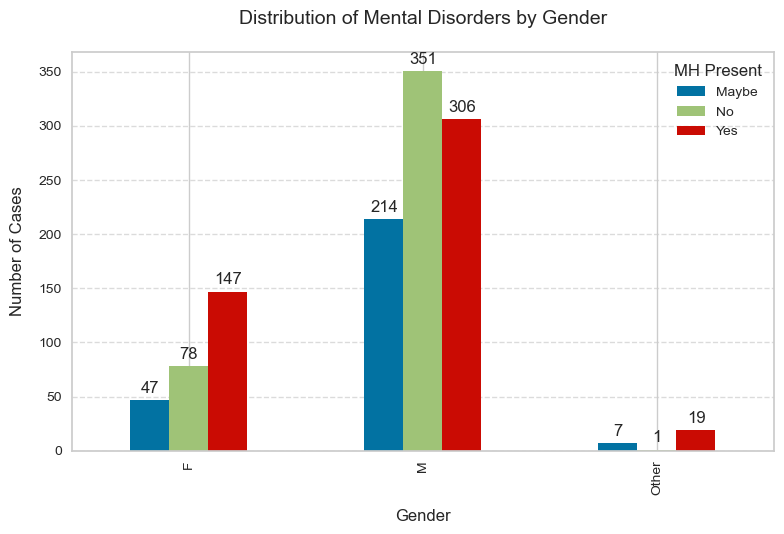

In [30]:
# Mental health group by Gender and MH present
mh_gender = df_analysis.groupby(['Gender', 'MH Present']).size().unstack(fill_value=0)

mh_gender.plot(kind='bar')
plt.title('Distribution of Mental Disorders by Gender', pad=20, size=14)
plt.xlabel('Gender', labelpad=10, size=12)
plt.ylabel('Number of Cases', labelpad=10, size=12)
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, padding=3)

plt.tight_layout()
plt.savefig('Distribution of Mental Disorders by Gender', transparent = True)

## Age

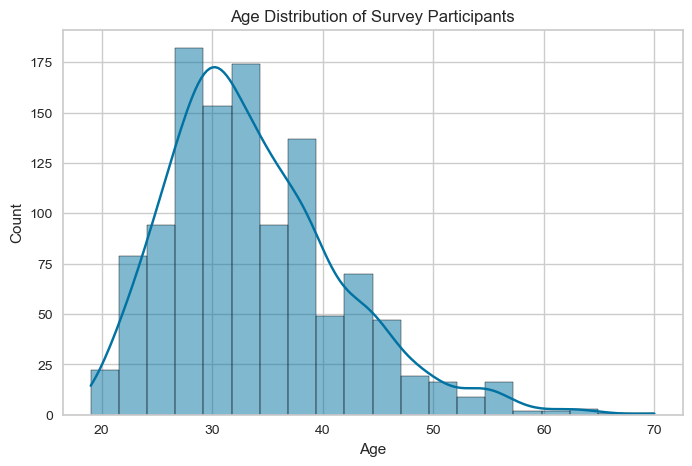

In [31]:
# Age Distribution of Survey Participants

plt.figure(figsize=(8, 5))
sns.histplot(df_analysis['Age'], bins=20, kde=True)
plt.title("Age Distribution of Survey Participants")
plt.xlabel("Age")
plt.ylabel("Count")
plt.savefig('Age Distribution', transparent = True)

In [32]:
_20s = df_analysis[(df_analysis['Age'] > 14) & (df_analysis['Age']< 30)]['Age'].count()
_30s = df_analysis[(df_analysis['Age'] > 29) & (df_analysis['Age']< 40)]['Age'].count()
_40s = df_analysis[(df_analysis['Age'] > 39) & (df_analysis['Age']< 50)]['Age'].count()
above_50 = df_analysis[(df_analysis['Age'] > 49)]['Age'].count()

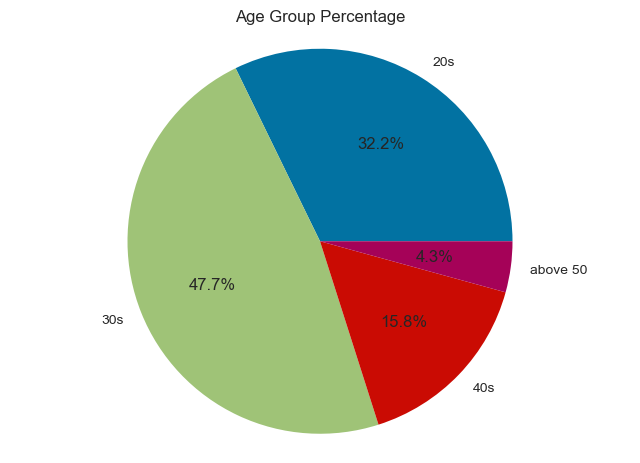

In [33]:
# Age Intervals
fig1, ax1 = plt.subplots()
sizes = [_20s, _30s, _40s, above_50]
ax1.pie(sizes, labels= ['20s', '30s', '40s', 'above 50'],autopct='%1.1f%%')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Age Group Percentage')
plt.savefig('Percentage count of Age group', transparent = True)

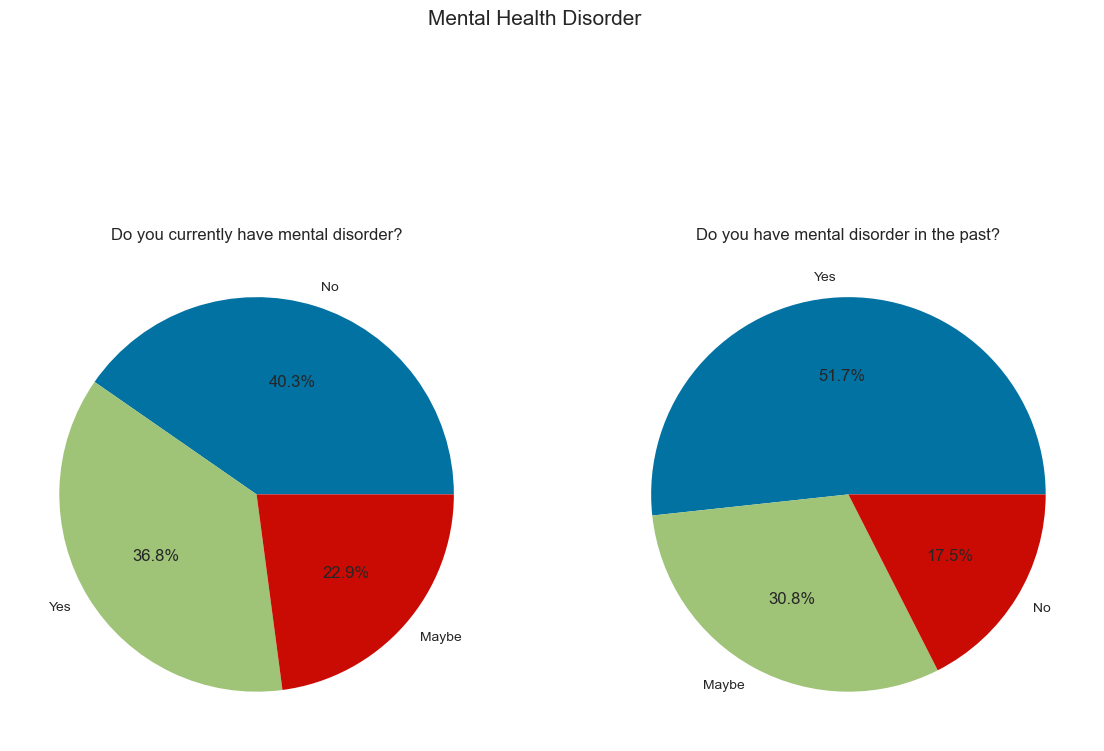

In [34]:
# Mental Health Disorder of Present and Past

fig, axs = plt.subplots(1, 2, figsize=(14, 10))
plt.suptitle('Mental Health Disorder', fontsize=15)

axs[0].pie(df_analysis['MH Present'].value_counts() , labels=df_analysis['MH Present'].unique(), autopct='%1.1f%%')
axs[0].set_title('Do you currently have mental disorder?')

axs[1].pie(df_analysis['MH Past'].value_counts() , labels=df_analysis['MH Past'].unique(), autopct='%1.1f%%')
axs[1].set_title('Do you have mental disorder in the past?')

plt.savefig('Mental Health Disorder', transparent = True)

## Work Position

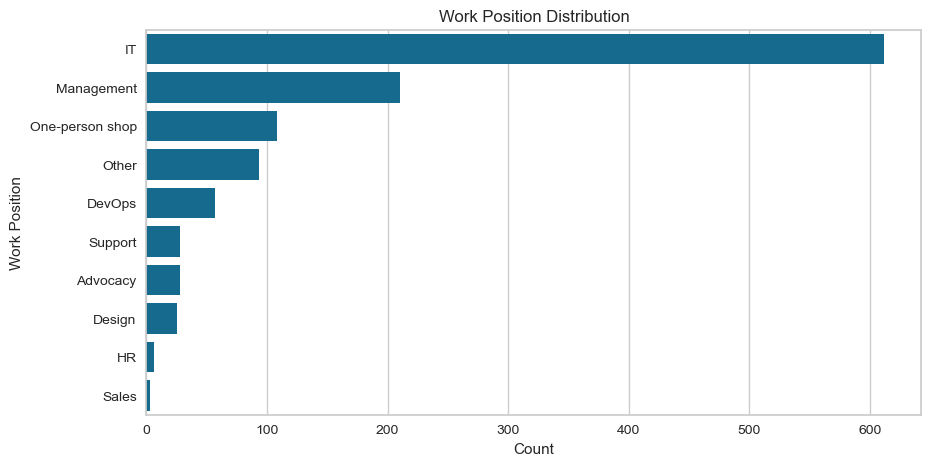

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df_analysis['Work Position'], order=df_analysis['Work Position'].value_counts().index)
plt.title("Work Position Distribution")
plt.xlabel("Count")
plt.ylabel("Work Position")
plt.savefig('Work Position', transparent = True)


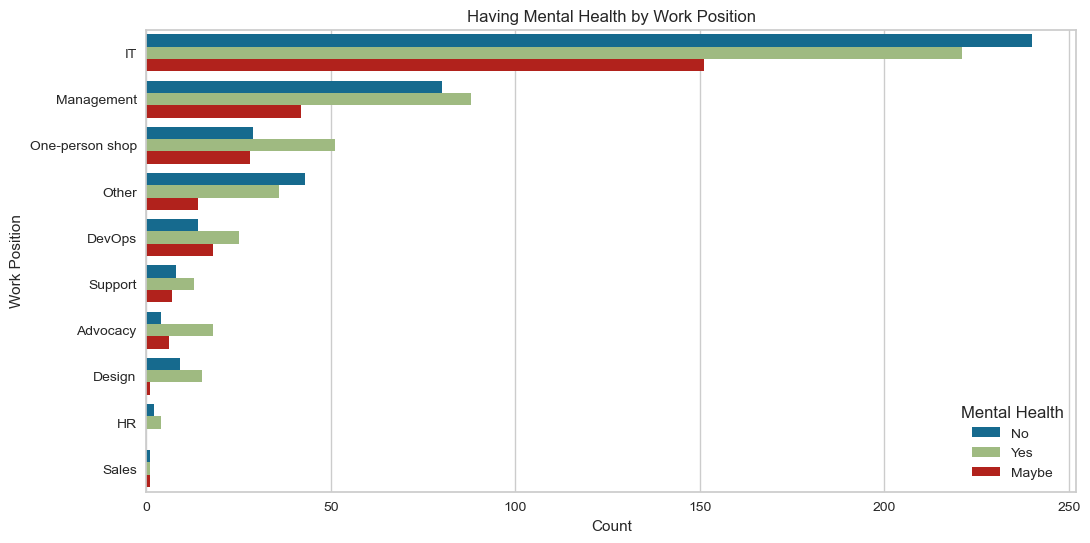

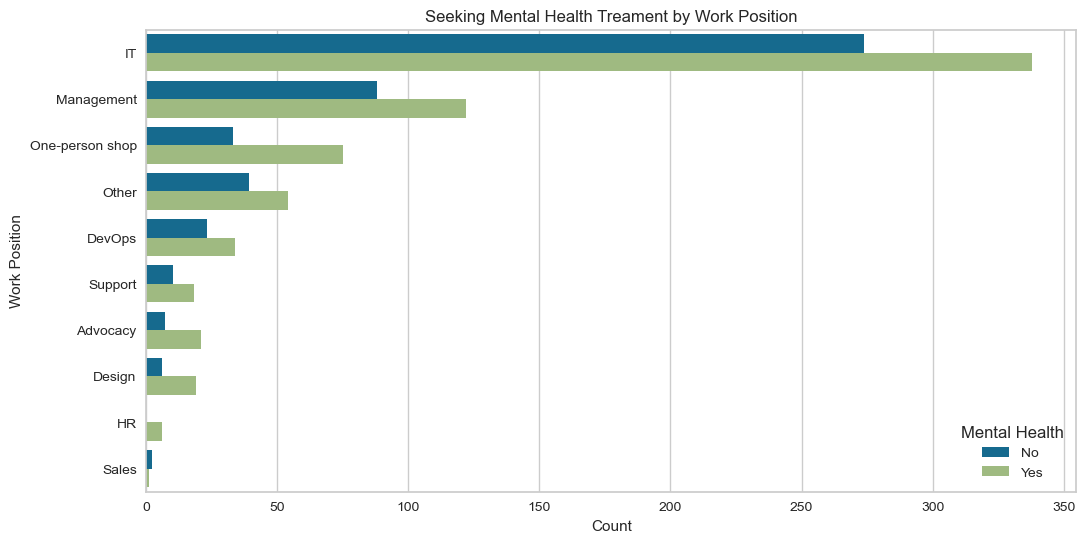

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df_analysis["Work Position"], order=df_analysis["Work Position"].value_counts().index, hue=df_analysis["MH Present"])
plt.title("Having Mental Health by Work Position")
plt.xlabel("Count")
plt.ylabel("Work Position")
plt.legend(title="Mental Health", labels=["No", "Yes", "Maybe"])
plt.savefig('Mental Health by Work Position', transparent = True)

plt.figure(figsize = (12,6))
sns.countplot(y =df_analysis['Work Position'], order =df_analysis['Work Position'].value_counts().index, hue = df_analysis['MH Sought Treatment'])
plt.title("Seeking Mental Health Treament by Work Position")
plt.xlabel("Count")
plt.ylabel("Work Position")
plt.legend(title="Mental Health", labels=["No", "Yes"])
plt.savefig('Mental Health Sought Treatment by Work Position', transparent = True)

# Feature Engineering and Feature Selection

In [115]:
df_cleaned = df1.copy()

In [116]:
categorical_features = df_cleaned.select_dtypes(include=['object']).columns

# Encoding categorical features
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Store encoders for reference

# Standardize numerical features
scaler = StandardScaler()
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])


In [117]:
# Apply variance thresholding (removing low-variance features)
selector = VarianceThreshold(threshold=0.01)  # Removing features with variance lower than 0.01
X_selected = selector.fit_transform(df_cleaned)

# Get selected feature names
selected_features = df_cleaned.columns[selector.get_support()]

In [118]:
selected_features_df = pd.DataFrame(selected_features, columns=["Selected Features"])
selected_features_df

,Selected Features
0,MH Benefits
1,MH Care Availability
2,MH Discussion
3,MH resources
4,Anonymity Protected
5,Medical Leave
6,MHD Neg Result
7,PHD Neg Result
8,MHD w Coworkers
9,MHD w DS


## Principal Component Analysis (PCA)

In [119]:
pca = PCA(n_components=0.95).fit(X_std)

# extract the explaind variance ratios
var_exp = pca.explained_variance_ratio_
print(var_exp)

# calculate the explained cumulative variance
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

# extract the eigenvectors
eig_vecs = pca.components_

# project the data to a two-dimensional feature space
Y = PCA(n_components=2).fit(X_std).transform(X_std)

[0.10858423 0.06675556 0.05356115 0.04890456 0.04607292 0.04140923
 0.03444494 0.030958   0.02969525 0.02723144 0.02688329 0.02503879
 0.0243697  0.02374143 0.02301497 0.02202655 0.02152077 0.02109023
 0.02034793 0.01985578 0.01919936 0.0187482  0.01840547 0.01789626
 0.01740896 0.01676751 0.01557946 0.01422647 0.01404942 0.01327113
 0.01320067 0.01275928 0.01245322 0.01218209 0.01151027 0.01070684]
[0.10858423 0.17533979 0.22890094 0.2778055  0.32387841 0.36528764
 0.39973258 0.43069058 0.46038583 0.48761727 0.51450056 0.53953934
 0.56390904 0.58765046 0.61066543 0.63269199 0.65421275 0.67530299
 0.69565092 0.7155067  0.73470605 0.75345425 0.77185973 0.78975599
 0.80716495 0.82393246 0.83951192 0.85373839 0.86778781 0.88105893
 0.8942596  0.90701888 0.91947211 0.9316542  0.94316447 0.95387131]


In [120]:
num_components = pca.n_components_
num_components

36

In [121]:
X_pca = pca.transform(X_std)

# K-Mean

/Users/minkhant/anaconda3/lib/python3.11/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/minkhant/anaconda3/lib/python3.11/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


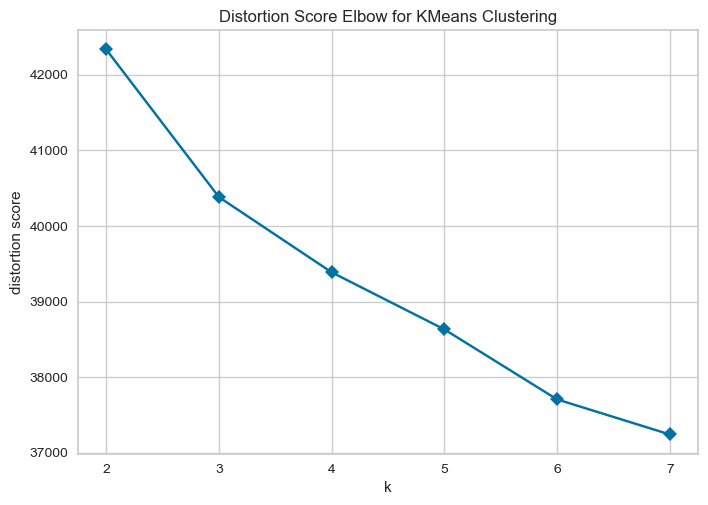

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [135]:
# Choosing the number of cluster
model = KMeans()
# Elbow method
visualizer = KElbowVisualizer(model, k=(2,8), timings=False)

# fit the visualizer and show the plot
visualizer.fit(X_pca)
plt.savefig('Elbow Method', transparent = True)
visualizer.show()

0.05440306119892481


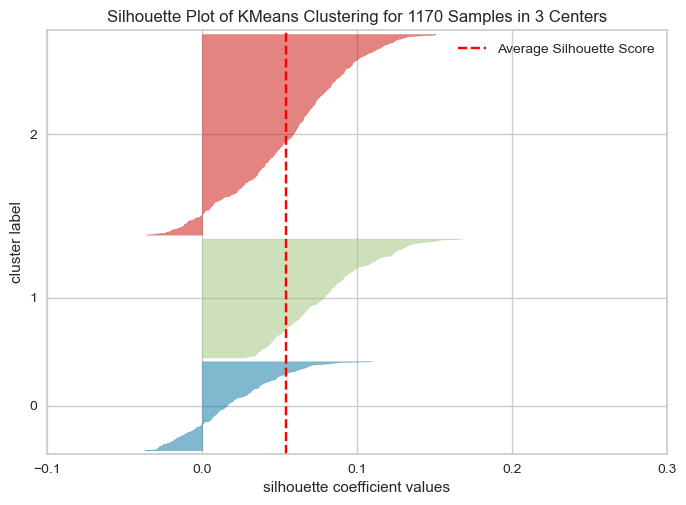

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1170 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [136]:
model = KMeans(n_clusters=3,random_state=0).fit(X_pca)
# extract labels, i.e. cluster associations
lab = model.labels_

# calculate the overall Silhouette score
S = silhouette_score(X_pca, lab)
print(S)

# generate, fit and show a Silhouette visualizer
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_pca)
plt.savefig('Silhouette Score', transparent = True)
visualizer.show()

In [137]:
# Performing K mean

kmeans = KMeans(n_clusters=3, random_state=0)
df_cleaned['Clusters'] = kmeans.fit_predict(X_pca)

In [138]:
cluster_characteristics = []
sizes = []
labels = kmeans.labels_
for i in range(3):
    cluster_data = X_pca[labels == i]
    cluster_size = len(cluster_data)
    cluster_center = centers[i]
    avg_distance = np.mean(np.linalg.norm(cluster_data - cluster_center, axis=1))
    cluster_characteristics.append({
        "Cluster": i + 1,
        "Size": cluster_size,
        "Avg Distance": avg_distance,
    })
    sizes.append(cluster_size)

cluster_characteristics

[{'Cluster': 1, 'Size': 255, 'Avg Distance': 7.385847870555637},
 {'Cluster': 2, 'Size': 341, 'Avg Distance': 6.807145755715458},
 {'Cluster': 3, 'Size': 574, 'Avg Distance': 7.161114733518096}]

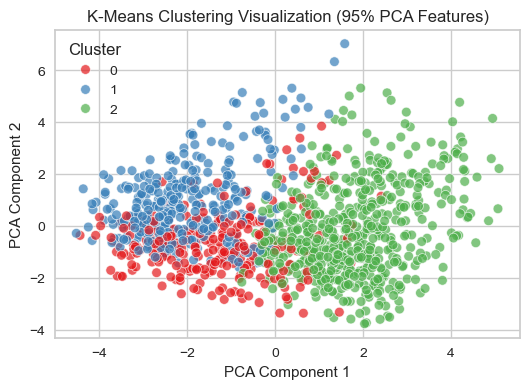

In [139]:
fig, ax = plt.subplots(figsize=(6,4))

# add data points
sns.scatterplot(x=X_pca[:,0], y=X_pca[:, 1], hue=df_cleaned['Clusters'], palette="Set1", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering Visualization (95% PCA Features)")
plt.legend(title="Cluster")
plt.savefig("K-Means Clustering", transparent = True)
plt.show()

# Visualization for the Cluster

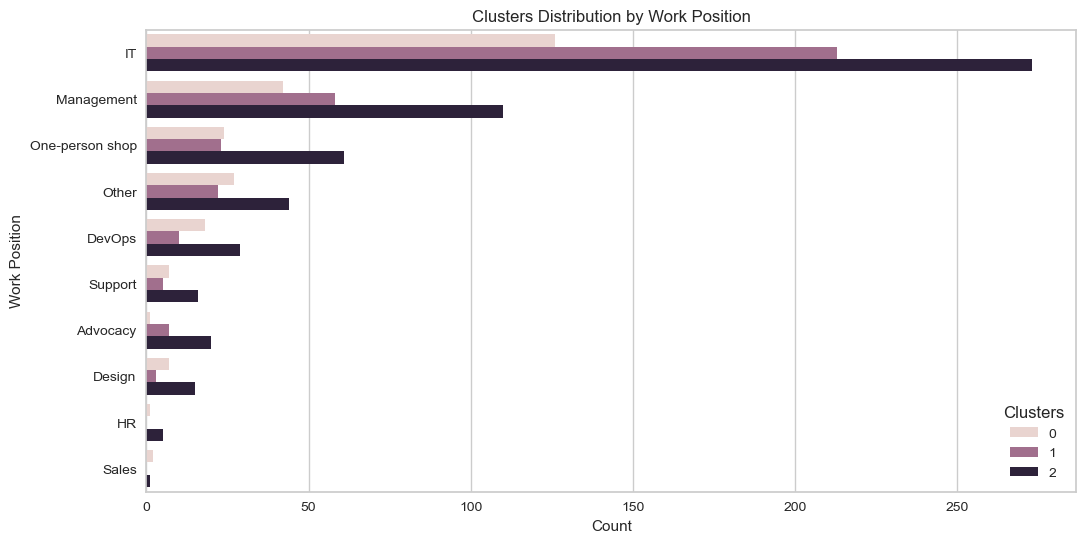

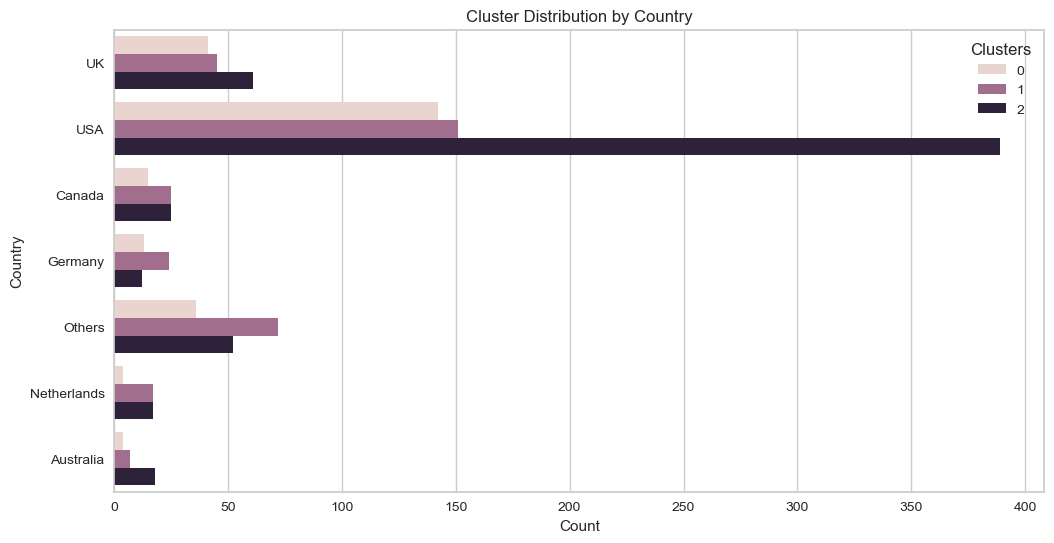

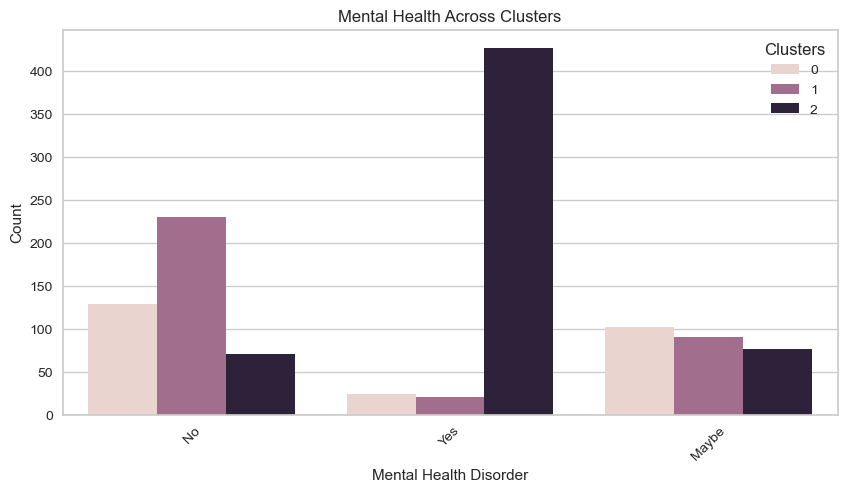

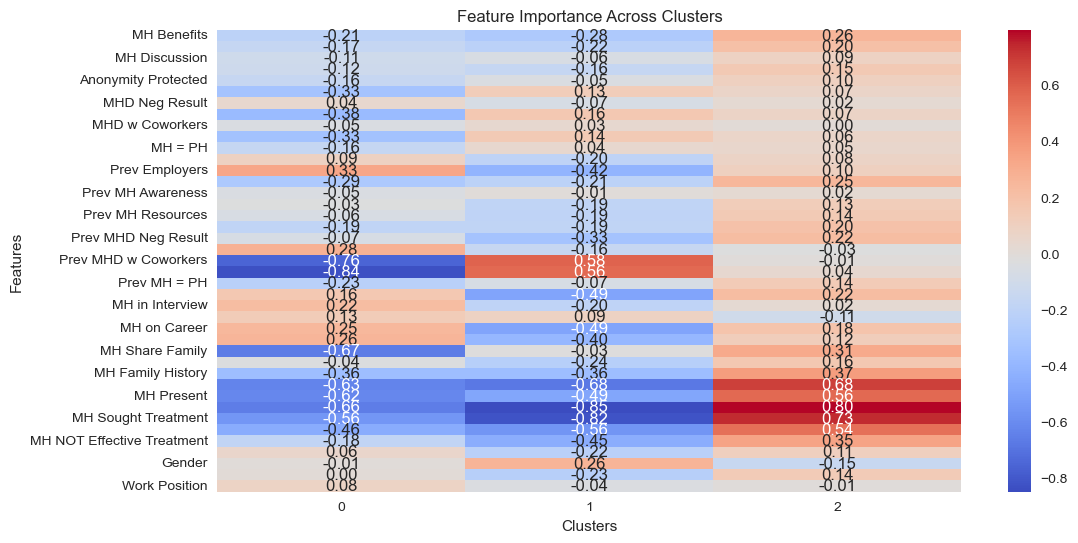

In [140]:
# Analyze Cluster Characteristics
cluster_means = df_cleaned.groupby("Clusters").mean()

# Cluster Distribution by Work Position
plt.figure(figsize=(12, 6))
sns.countplot(y=df1["Work Position"], hue=df_cleaned["Clusters"], order=df1["Work Position"].value_counts().index)
plt.title("Clusters Distribution by Work Position")
plt.xlabel("Count")
plt.ylabel("Work Position")
plt.legend(title="Clusters")
plt.savefig("Work Position and Clusters", transparent = True)
plt.show()

# Cluster Distribution by Country
plt.figure(figsize=(12, 6))
top_countries = df1["Country/Work"].value_counts().nlargest(10).index
filtered_df = df1[df1["Country/Work"].isin(top_countries)]
sns.countplot(y=filtered_df["Country/Work"], hue=df_cleaned.loc[filtered_df.index, "Clusters"])
plt.title("Cluster Distribution by Country")
plt.xlabel("Count")
plt.ylabel("Country")
plt.legend(title="Clusters")
plt.savefig("Country and Clusters", transparent = True)
plt.show()

# Cluster Distribution by Age Group

plt.figure(figsize = (12, 6))
age_group = [_20s, _30s, _40s, above_50]
sns.countplot(y = age_group, hue = df_cleaned["Clusters"], order = age_group.value_counts().index)

# Mental Health Across Clusters
plt.figure(figsize=(12, 6))
sns.countplot(x=df1["MH Present"], hue=df_cleaned["Clusters"])
plt.title("Mental Health Across Clusters")
plt.xlabel("Mental Health Disorder")
plt.ylabel("Count")
plt.legend(title="Clusters")
plt.xticks(rotation=45)
plt.savefig("Mental Health and Clusters", transparent = True)
plt.show()

# Heatmap of Cluster Feature Importance
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Importance Across Clusters")
plt.xlabel("Clusters")
plt.ylabel("Features")
plt.savefig("Cluster Feature Importance", transparent = True)
plt.show()

In [128]:
cluster_mean_df = pd.DataFrame(cluster_means)
cluster_mean_df

,MH Benefits,MH Care Availability,MH Discussion,MH resources,Anonymity Protected,Medical Leave,MHD Neg Result,PHD Neg Result,MHD w Coworkers,MHD w DS,MH = PH,MH Coworker States Neg Result,Prev Employers,Prev MH Benefits,Prev MH Awareness,Prev MHD,Prev MH Resources,Prev Anonymity Protected,Prev MHD Neg Result,Prev PHD Neg Result,Prev MHD w Coworkers,Prev MHD w DS,Prev MH = PH,Prev MH Coworker States Neg Result,MH in Interview,Why/not_1,MH on Career,Neg View of Coworker,MH Share Family,MH Bad Response,MH Family History,MH Past,MH Present,MH Diagonosed,MH Sought Treatment,MH Effective Treatment,MH NOT Effective Treatment,Age,Gender,Country/Work,Work Position
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.209872,-0.165670,-0.110871,-0.118374,-0.159593,-0.327776,0.043121,-0.378539,-0.049574,-0.329128,-0.162239,0.094601,0.333417,-0.287901,-0.045761,-0.032246,-0.061682,-0.189576,-0.067510,0.276647,-0.757923,-0.835014,-0.227444,0.156155,0.219375,0.130582,0.248998,0.260347,-0.666442,-0.038455,-0.356996,-0.631631,-0.618918,-0.659330,-0.557324,-0.455232,-0.181216,0.056955,-0.005136,0.004993,0.080369
1,-0.279821,-0.215945,-0.060383,-0.161509,-0.045410,0.127284,-0.068424,0.156844,0.034198,0.141399,0.042997,-0.199603,-0.417934,-0.208995,-0.005752,-0.187077,-0.193915,-0.189784,-0.325810,-0.156974,0.579500,0.564983,-0.067124,-0.489629,-0.199766,0.086829,-0.491463,-0.398110,-0.025166,-0.236771,-0.355738,-0.678780,-0.485484,-0.849959,-0.819367,-0.564875,-0.448901,-0.224298,0.263901,-0.232830,-0.041713
2,0.259471,0.201887,0.085127,0.148536,0.097876,0.069999,0.021493,0.074989,0.001707,0.062213,0.046532,0.076553,0.100164,0.252059,0.023746,0.125463,0.142603,0.196965,0.223548,-0.029646,-0.007559,0.035313,0.140919,0.221505,0.021219,-0.109594,0.181349,0.120849,0.311018,0.157744,0.369931,0.683850,0.563370,0.797849,0.734359,0.537816,0.347187,0.107948,-0.154496,0.136101,-0.010923


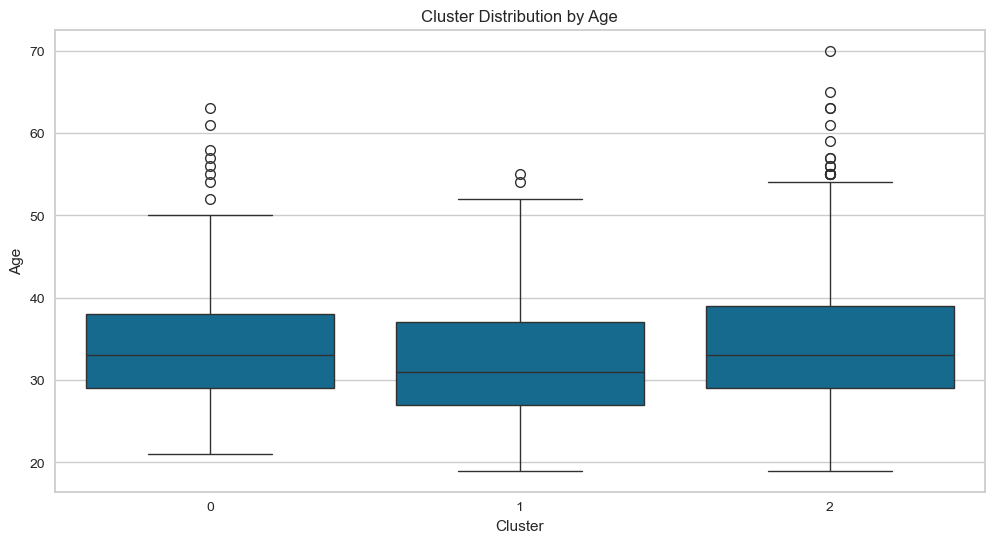

In [155]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = df1["Age"], x = df_cleaned["Clusters"])
plt.title("Cluster Distribution by Age")
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.show()